# 注意力机制

- 学习目标：
  1. 了解什么是注意力计算规则和注意力机制
  2. 掌握注意力计算规则的实现
---
- 什么是注意力：
  - 我们观察事物时，之所以能够快速判断一种事物（当然允许判断是错误的），是因为我们大脑能够很快把注意力放在事物最具有辨识度的部分从而作出判断，而并非是从头到尾的观察一遍事物后，才能有判断结果。正是基于这样的理论，从而产生了注意力机制
---
- 什么是注意力计算规则：
  - 它需要三个指定的输入Q(query),K(key),V(value),然后通过公式得到注意力的计算结果，这个结果代表query在key和value作用下的表示，而这个具体地计算规则有很多种，这里只介绍一种
---
- 这里使用的注意力的计算规则：
  - $$ Attention(Q,K,V)=softmax(\frac{QK^T}{\sqrt{d_k}})V $$
---
**Q、K、V的比喻解释：**

- 假如我们有一个问题: 给出一段文本，使用一些关键词对它进行描述!
- 为了方便统一正确答案，这道题可能预先已经给大家写出了一些关键词作为提示
- 其中这些给出的提示就可以看作是key
- 而整个的文本信息就相当于是query
- value的含义则更抽象，可以比作是你看到这段文本信息后，脑子里浮现的答案信息，
- 这里我们又假设大家最开始都不是很聪明，第一次看到这段文本后脑子里基本上浮现的信息就只有提示这些信息因此key与value基本是相同的，但是随着我们对这个问题的深入理解，通过我们的思考脑子里想起来的东西越来越多
- 并且能够开始对我们query也就是这段文本，提取关键信息进行表示。这就是注意力作用的过程，通过这个过程，我们最终脑子里的value发生了变化，
- 根据提示key生成了query的关键词表示方法，也就是另外一种特征表示方法

- 刚刚我们说到key和value一般情况下默认是相同，与query是不同的，这种是我们一般的注意力输入形式
- 但有一种特殊情况，就是我们query与key和value相同，这种情况我们称为自注意力机制
- 就如同我们的刚刚的使用一般注意力机制，是使用不同于给定文本的关键词表示它。
- 而自注意力机制，需要用给定文本自身来表达自己，也就是说你需要从给定文本中抽取关键词来表述它，相当于对文本自身的一次特征提取

g老师和文老师给的例子：

eg1:
> 注意力机制中的 QKV（Query-Key-Value）可以用以下比喻来解释：
想象你在学校里参加一个大型会议，你是一个学生（Query），你有一个问题想要提问。在会场上，有很多老师和同学（Key），他们每个人都有自己的知识和经验。然后，你开始寻找能够回答你问题的人（Value）。你会提出问题（Query），寻找谁能够最好地回答它，然后你会把问题（Query）和对应的人（Key）联系起来，最终得到你想要的答案（Value）。
在这个比喻中，你的问题（Query）是你想要关注的内容，老师和同学（Key）是被注意力机制用来比较相似度的对象，而他们的知识和经验（Value）是与你的问题相关的信息。注意力机制就像是在这个会议中帮助你找到最合适回答问题的人的过程，它会通过比较你的问题与每个人的相关性来决定谁能够提供最好的答案。

eg2:
> 假设你正在做一道数学题，而这道题目涉及到多个步骤和概念。首先，你有一个问题（Query），即题目中的要求或者是你需要解决的问题。然后，你开始查找相关的信息（Key），这些信息可能包括公式、定理、类似题目的解法等等。最后，你要把这些信息应用到题目中去（Value），以解决问题。
在这个比喻中，你的问题（Query）是题目中需要解决的内容，而你查找的相关信息（Key）则是你在题目中用到的各种概念、知识和方法。最后，通过将这些信息应用到题目中（Value），你可以得到最终的答案。
注意力机制就像是在你解题的过程中，帮助你找到最相关的信息以及如何将它们应用到题目中去的机制。通过比较你的问题与每个相关信息的关联程度，注意力机制可以帮助你更有效地解决问题。

eg3:
> 在注意力机制中，QKV（Query、Key、Value）可以被形象地比喻为以下过程：
假设Q是一个问题或者一个需要寻找的目标，而V则是一个包含答案的“字典”或者“数据库”。我们的任务是在V中找到与Q最相关的部分，即答案。而K在这里起到了一个桥梁的作用，它类似于将V这本“字典”转换成了一本全是同义词的“字典”。这样，当Q在寻找答案时，K能够帮助它更准确地匹配到V中的相关部分。
具体来说，Q（查询）表示一段准备被概括或查询的文本或信息。它代表了我们想要从V中获取的具体内容或目标。K（键）则作为一个提示或索引，它帮助我们在V中找到与Q最匹配的部分。K与Q之间的相似度计算（如点积）决定了V中哪些部分应该受到更多的“注意力”。最后，V（值）包含了实际的信息或内容，它是我们最终想要获取或关注的部分。
因此，QKV在注意力机制中的形象比喻可以理解为：Q是问题或目标，V是包含答案的“字典”，而K则是帮助Q在V中找到正确答案的桥梁或索引。这种比喻有助于我们更直观地理解注意力机制中QKV的作用和关系。

eg4:
> 在注意力机制中，QKV（Query、Key、Value）关于做题的形象比喻可以这样理解：
假设你正在准备一场考试，而Q就代表着你的“问题”或者“疑惑”，也就是你在做题时遇到的难题或不确定的知识点。这些问题是你想要解答的，是你注意力的焦点。
K在这里就像是一个“索引”或者“关键词”。你可以把K想象成一本参考答案书或知识手册的目录，它列出了各个知识点的索引和关键提示。当你面对一个难题时，你会根据K中的“关键词”或“索引”去查找相关的知识点或解题方法。
而V则代表了“答案”或“详细解释”。它就像是一本详细的答案解析书，包含了每个问题的完整解答和深入解释。通过K的帮助，你可以在V中找到与Q对应的具体答案和解释，从而解决你的疑惑。
因此，在做题的过程中，你会不断地使用QKV的注意力机制：首先识别出问题或疑惑（Q），然后通过关键词或索引（K）去查找相关的答案或解释（V），最终解决你的问题。这种形象比喻有助于我们更好地理解注意力机制中QKV的作用和关系，以及它们如何协同工作来帮助我们解决问题。


---
- 什么是注意力机制：
  - 注意力机制是注意力计算规则能够应用的深度学习网络的载体，除了注意力计算规则外，还包括一些必要的全连接层以及相关张量处理，使其与应用网络融为一体，使用自注意力计算规则的注意力机制称为自注意力机制。
---
- 注意力机制在网络中实现的图形表示：



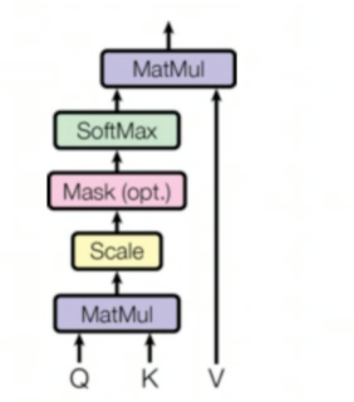

- 注意力计算规则的代码分析：

In [18]:
import torch
import math
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

In [13]:
# 创建Embedding类来实现文本嵌入层
class Embeddings(nn.Module):
    def __init__(self, d_model, vocab):
        # d_model : 词嵌入的维度
        # vocab : 词表的大小
        super(Embeddings,self).__init__()
        # 定义Embedding层
        self.lut = nn.Embedding(vocab,d_model)
        # 将参数传入类中
        self.d_model = d_model
    def forward(self,x):
        # x: 代表输入进模型的文本通过词汇映射后的数字张量
        return self.lut(x) * math.sqrt(self.d_model)

In [14]:
class PositionalEncoding(nn.Module):
    def __init__(self,d_model,dropout,max_len=5000):
        # d_model : 代表词嵌入的维度
        # dropout ： 代表Dropout 层的置零比率
        # max_len : 代表每个句子的最长长度
        super(PositionalEncoding,self).__init__()

        self.dropout = nn.Dropout(p=dropout)
        pe = torch.zeros(max_len,d_model)
        position = torch.arange(0,max_len).unsqueeze(1)

        # 定义一个变化矩阵div_term,跳跃式的初始化
        div_term = torch.exp(torch.arange(0,d_model,2) * 
                             -(math.log(10000.0) / d_model))
        # 将前面定义的变化矩阵进行奇数，偶数分别赋值
        pe[:,0::2] = torch.sin(position * div_term)
        pe[:,1::2] = torch.cos(position * div_term)

        # 将二维张量扩充成三维张量
        pe = pe.unsqueeze(0)

        # 将位置编码矩阵注册成模型的buffer，这个buffer不是模型中的参数，不跟随优化器同步更新
        # 注册成buffer后我们就可以在模型保存后重新加载的时候，将这个位置编码和模型参数一同加载进来
        self.register_buffer("pe",pe)
    def forward(self,x):
        # x:代表文本序列的词嵌入表示
        # 首先明确pe的编码太长了，将第二个维度
        # 也就是max_len对应的那个维度缩小成x的句子长度同等的长度
        x = x + Variable(self.pe[:,:x.size(1)],requires_grad=False)
        return self.dropout(x)

In [6]:
def attention(query,key,value,mask=None,dropout=None):
    ''' 注意力机制的实现，输入分别是query,key,value,mask:掩码张量，
    dropout是nn.Dropout层的实例化对象，默认为None'''
    # 在函数中，首先取query的最后一维的大小，一般情况下就等同于我们的词嵌入维度，命名为d_k
    d_k = query.size(-1)
    # 按照注意力公式，将query与key的转置相乘，这里面key是将最后两个维度进行转置，再除以缩放系数根号下d_k
    # 得到注意力得分张量score
    scores = torch.matmul(query,key.transpose(-2,-1))/math.sqrt(d_k)

    # 接着判断是否使用掩码张量
    if mask is not None:
        # 使用tensor的mask_fill方法，将掩码张量和scores张量每个位置一一比较，如果掩码张量处为0
        # 则对应的scores张量用-1e9这个值来替换，如下演示
        scores = scores.masked_fill(mask == 0,-1e9)

    # 对scores的最后一维进行softmax操作，使用F.softmax方法
    # 第一个参数是softmax对象，第二个是目标维度，这样获得最终的注意力张量
    p_attn = F.softmax(scores,dim=-1)

    # 之后判断是否使用dropout进行随机置0
    if dropout is not None:
        # 将p_attn传入dropout对象中进行'丢弃'处理
        p_attn = dropout(p_attn)

    # 最后，根据公式将p_attn与value张量相乘获得最终的query注意力表示，同时返回注意力张量
    return torch.matmul(p_attn,value),p_attn
    

- tensor.masked_fill演示：

In [7]:
input = Variable(torch.randn(5,5))
input

tensor([[ 1.7282,  1.6039,  0.9301, -0.5326, -1.0554],
        [-0.5858, -0.2384,  1.7336,  0.8530, -0.5445],
        [-0.5413, -1.2795, -1.9727, -1.9520, -1.6329],
        [ 0.8244,  0.2182, -0.1689, -1.3380, -0.0549],
        [-1.6961,  0.8898, -0.9994, -1.9846, -2.1228]])

In [8]:
mask = Variable(torch.zeros(5,5))
mask

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [9]:
input.masked_fill(mask == 0,-1e9)

tensor([[-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09],
        [-1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09, -1.0000e+09]])

- 输入参数：

In [15]:
d_model = 512
dropout = 0.1
vocab = 1000
max_len = 60

x = Variable(torch.LongTensor([[100,2,421,508],[491,998,1,221]]))
emb = Embeddings(d_model,vocab)
embr = emb(x)

x = embr
pe = PositionalEncoding(d_model,dropout,max_len)
pe_result = pe(x)

In [16]:
# 我们令输入的query,key,value都相同，位置编码的输出
query = key = value = pe_result

In [20]:
# 调用
attn,p_attn = attention(query,key,value)
print("attn:",attn)
print(attn.shape)
print("p_attn:",p_attn)
print(p_attn.shape)

attn: tensor([[[ 30.3032,  24.0806, -31.4100,  ..., -41.7959,  17.4818, -11.7300],
         [ 31.3697,   0.0000, -14.7112,  ...,  -2.6100,  25.7831,   5.7453],
         [  0.0000,   0.0000,  42.4054,  ..., -19.9310, -20.2005,   2.3002],
         [-53.0935, -42.8823,  12.0033,  ...,  10.3572, -18.9581, -26.4321]],

        [[ -9.0882,   0.0000, -28.9496,  ...,   0.2590,  57.3677,   6.1996],
         [ 62.7543, -23.4323,   4.0014,  ..., -13.3426, -44.1095,   5.4944],
         [ 44.5673,  -4.8994,   4.5877,  ..., -17.5809,  26.8017,  -1.6438],
         [ 10.0651,  -8.1329,   0.0000,  ...,  27.2477, -38.3149,  -3.0623]]],
       grad_fn=<UnsafeViewBackward0>)
torch.Size([2, 4, 512])
p_attn: tensor([[[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]],

        [[1., 0., 0., 0.],
         [0., 1., 0., 0.],
         [0., 0., 1., 0.],
         [0., 0., 0., 1.]]], grad_fn=<SoftmaxBackward0>)
torch.Size([2, 4, 4])


输出结果解释:

**query的注意力表示**：
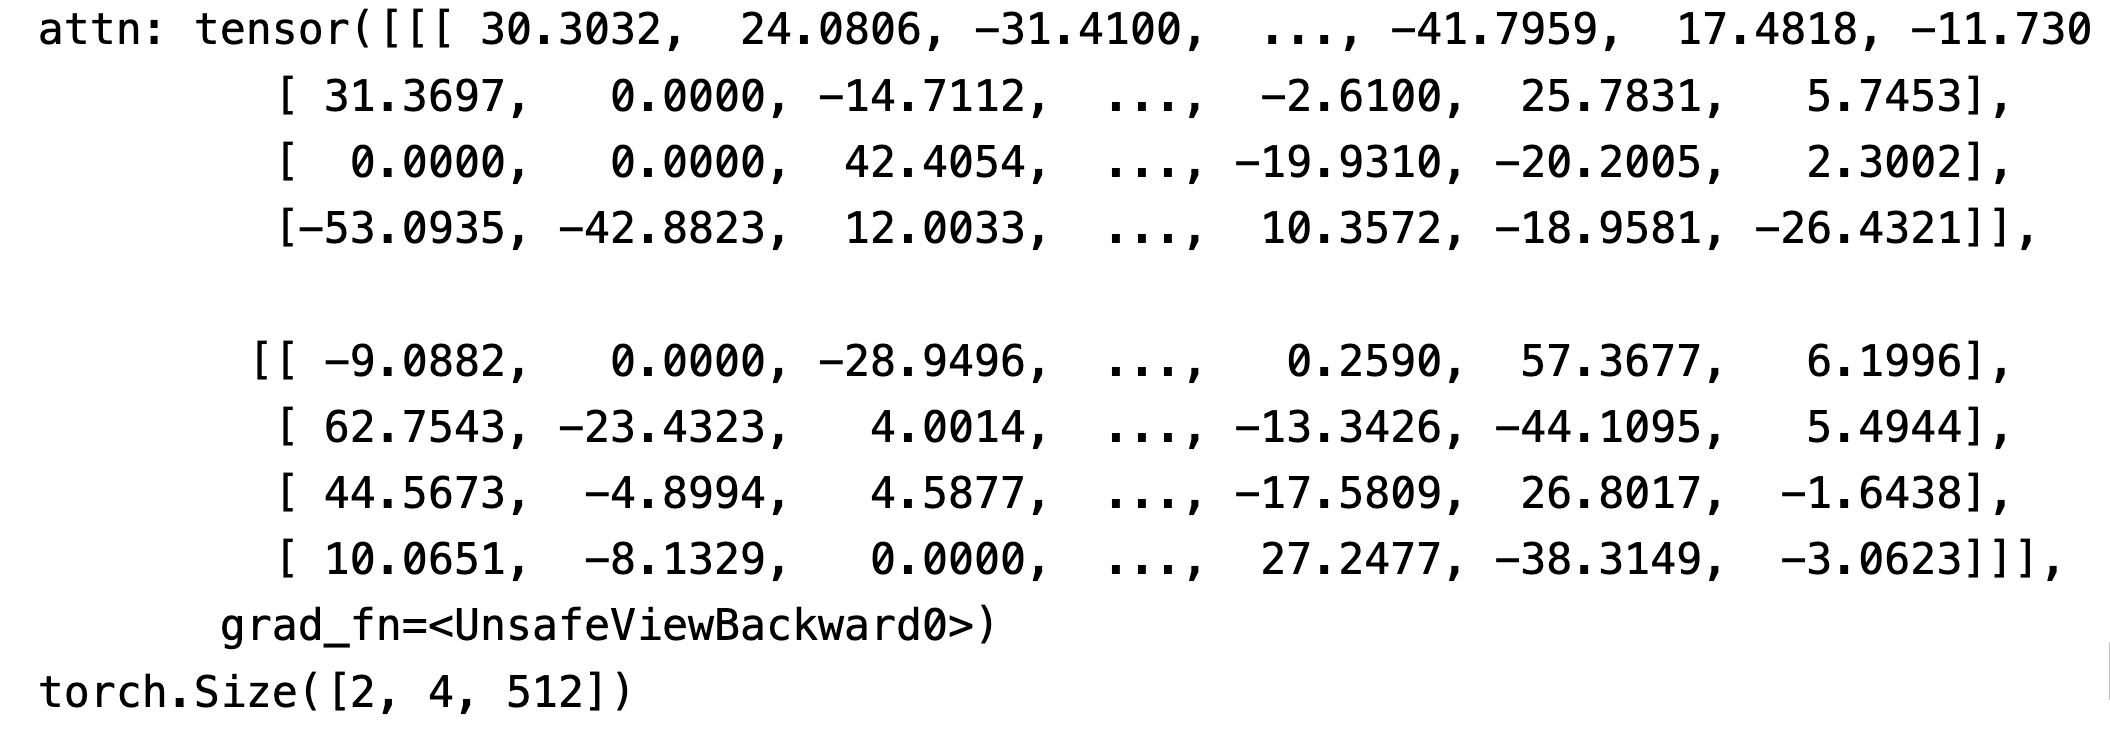

**注意力张量**：
注意一下size
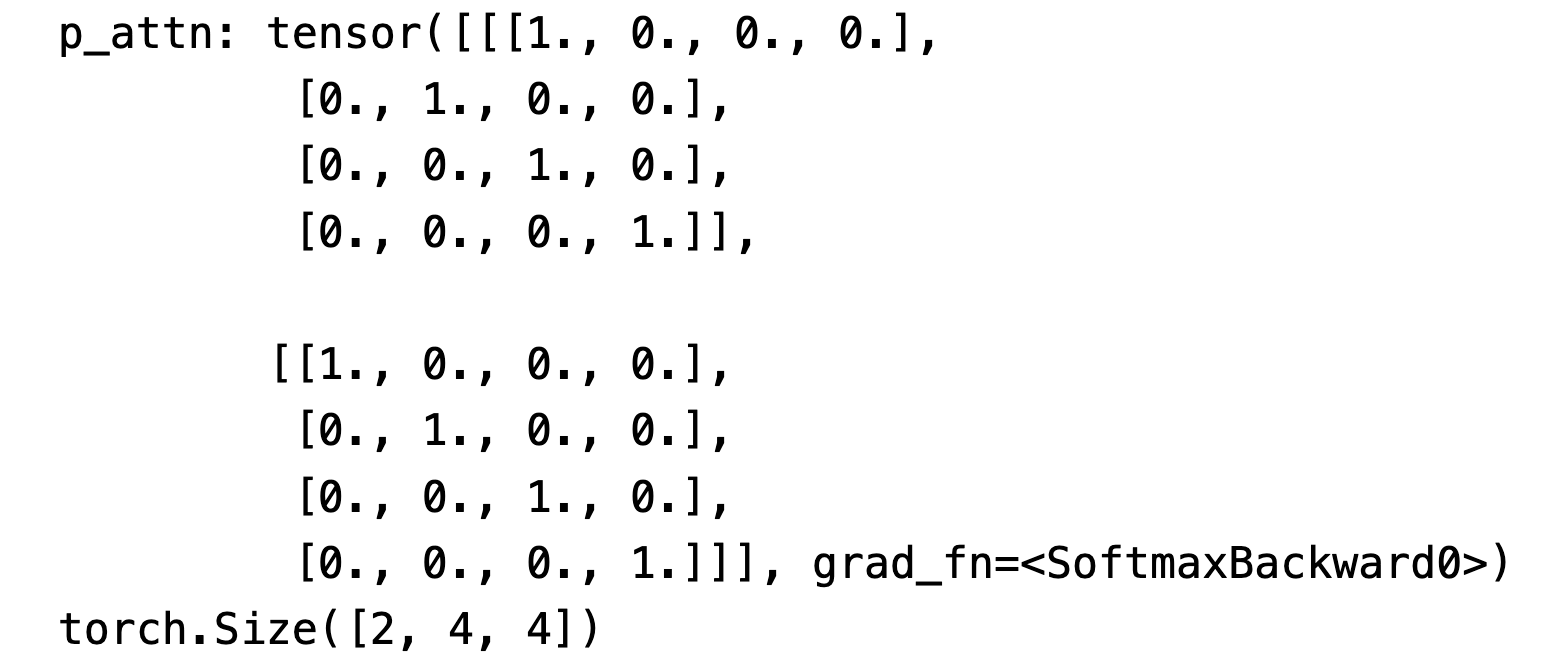

- 带有mask的输入参数：

In [21]:
query = key = value = pe_result

# 令mask为一个2×4×4的零张量
mask = Variable(torch.zeros(2,4,4))

In [ ]:
# 调用